In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
all_df = pd.read_csv('cancer.csv')

# Split the data into training (70%) and testing (30%) sets
train_df, test_df = train_test_split(all_df, test_size=0.3, random_state=42)

# Display the shapes of the two datasets
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)

Train DataFrame shape: (600, 36)
Test DataFrame shape: (258, 36)


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 28 to 102
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 600 non-null    int64 
 1   Number of sexual partners           600 non-null    object
 2   First sexual intercourse            600 non-null    object
 3   Num of pregnancies                  600 non-null    object
 4   Smokes                              600 non-null    object
 5   Smokes (years)                      600 non-null    object
 6   Smokes (packs/year)                 600 non-null    object
 7   Hormonal Contraceptives             600 non-null    object
 8   Hormonal Contraceptives (years)     600 non-null    object
 9   IUD                                 600 non-null    object
 10  IUD (years)                         600 non-null    object
 11  STDs                                600 non-null    objec

In [4]:
train_df.corr()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,-0.010359,0.104024,0.030819,0.089257,0.057218,0.006380,0.076639,-0.019745,0.056748
STDs: Number of diagnosis,-0.010359,1.000000,-0.041895,0.016907,-0.041895,-0.016036,0.069885,0.111707,0.014113,0.089574
Dx:Cancer,0.104024,-0.041895,1.000000,-0.015521,0.914966,0.641395,0.089363,0.123335,0.164420,0.152721
Dx:CIN,0.030819,0.016907,-0.015521,1.000000,-0.015521,0.656399,-0.022655,0.020875,-0.027449,0.157632
Dx:HPV,0.089257,-0.041895,0.914966,-0.015521,1.000000,0.567501,0.089363,0.123335,0.164420,0.152721
Dx,0.057218,-0.016036,0.641395,0.656399,0.567501,1.000000,0.069027,0.094296,0.132424,0.204598
Hinselmann,0.006380,0.069885,0.089363,-0.022655,0.089363,0.069027,1.000000,0.640481,0.158041,0.479259
Schiller,0.076639,0.111707,0.123335,0.020875,0.123335,0.094296,0.640481,1.000000,0.391233,0.740877
Citology,-0.019745,0.014113,0.164420,-0.027449,0.164420,0.132424,0.158041,0.391233,1.000000,0.326358
Biopsy,0.056748,0.089574,0.152721,0.157632,0.152721,0.204598,0.479259,0.740877,0.326358,1.000000


<AxesSubplot:xlabel='Dx:HPV', ylabel='count'>

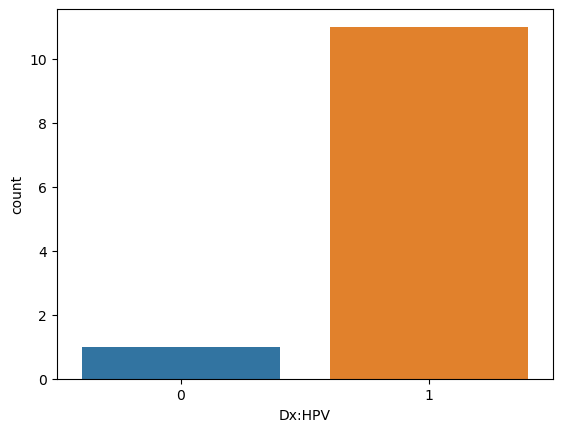

In [5]:
sns.countplot(data=train_df[train_df['Dx:Cancer'] == 1], x="Dx:HPV")

<AxesSubplot:xlabel='Dx:HPV', ylabel='count'>

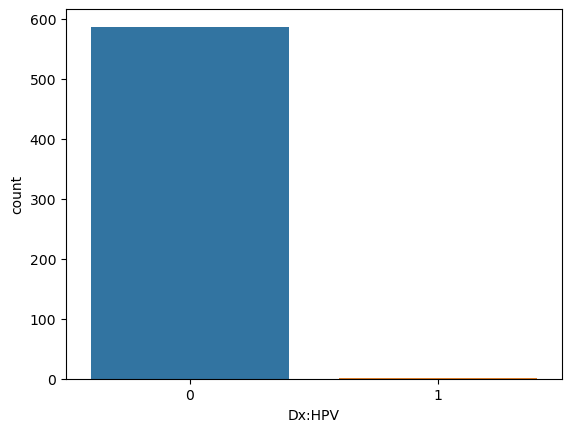

In [6]:
sns.countplot(data=train_df[train_df['Dx:Cancer'] == 0], x="Dx:HPV")

<AxesSubplot:xlabel='Dx:Cancer', ylabel='Dx:HPV'>

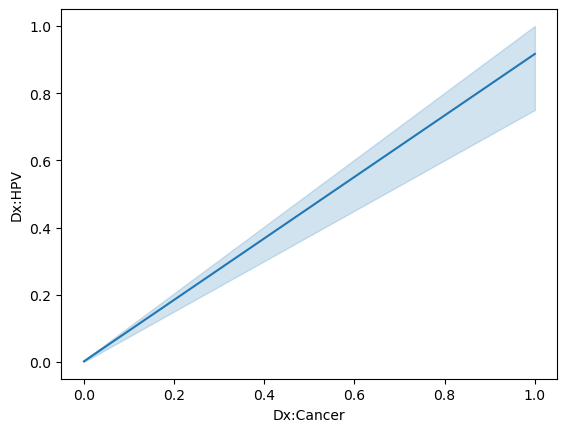

In [7]:
sns.lineplot(data=train_df, x="Dx:Cancer", y="Dx:HPV")

<AxesSubplot:xlabel='Dx:Cancer', ylabel='count'>

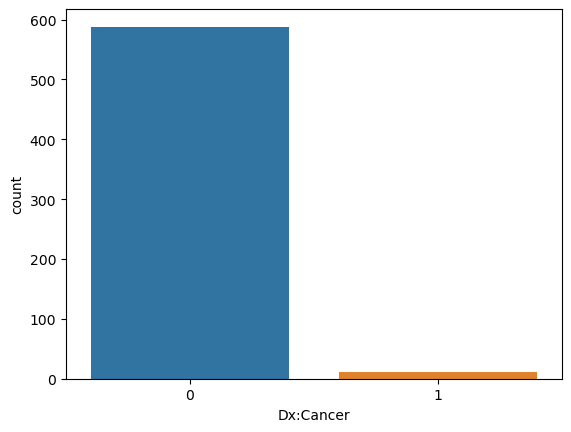

In [8]:
sns.countplot(data=train_df,x="Dx:Cancer")

<AxesSubplot:xlabel='Dx:Cancer', ylabel='count'>

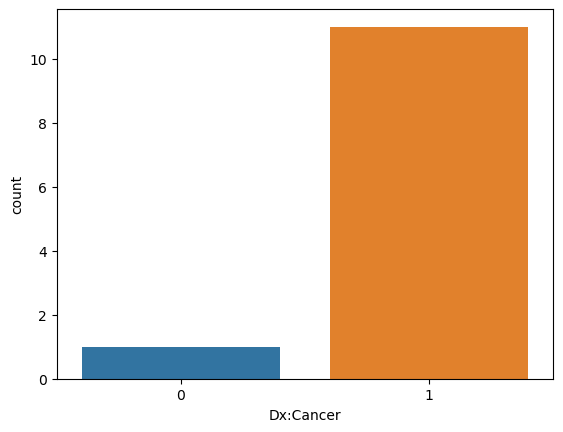

In [9]:
HPV_df = train_df[train_df['Dx:HPV'] == 1]
sns.countplot(data=HPV_df, x="Dx:Cancer")

In [10]:
print(len(HPV_df[HPV_df["Dx:Cancer"]==1]))
print(len(HPV_df[HPV_df["Dx:Cancer"]==0]))

11
1


In [11]:
HPV_df[HPV_df["Dx:Cancer"]==1]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
578,19,1.0,18.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,?,?,1,0,1,1,1,1,1,1
335,29,2.0,18.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,1,1,1
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
738,27,6.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
188,27,5.0,19.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,...,?,?,1,0,1,1,0,0,1,0
849,32,3.0,18.0,1.0,1.0,11.0,0.16,1.0,6.0,0.0,...,?,?,1,0,1,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
797,33,3.0,19.0,3.0,0.0,0.0,0.0,1.0,0.16,1.0,...,?,?,1,0,1,1,1,1,0,1
727,31,2.0,19.0,2.0,0.0,0.0,0.0,1.0,9.0,0.0,...,?,?,1,0,1,1,0,0,1,0
64,38,2.0,15.0,4.0,0.0,0.0,0.0,1.0,16.0,0.0,...,?,?,1,0,1,0,0,1,0,1


<AxesSubplot:xlabel='Dx:Cancer', ylabel='count'>

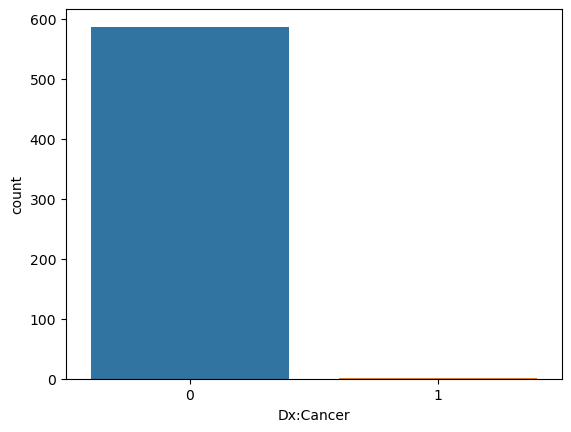

In [12]:
nonHPV_df = train_df[train_df['Dx:HPV'] == 0]
sns.countplot(data=nonHPV_df, x="Dx:Cancer")

In [13]:
print(len(nonHPV_df[nonHPV_df["Dx:Cancer"]==1]))
print(len(nonHPV_df[nonHPV_df["Dx:Cancer"]==0]))

1
587


In [14]:
nonHPV_df.corr()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,-0.006738,0.022626,0.032755,NaN,0.038714,0.010909,0.075374,-0.017356,0.053174
STDs: Number of diagnosis,-0.006738,1.000000,-0.012238,0.016273,NaN,0.010882,0.076729,0.121326,0.022229,0.100959
Dx:Cancer,0.022626,-0.012238,1.000000,-0.004530,NaN,0.351439,-0.008328,-0.012445,-0.009902,-0.010541
Dx:CIN,0.032755,0.016273,-0.004530,1.000000,NaN,0.934609,-0.022146,0.023639,-0.026333,0.168188
Dx:HPV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dx,0.038714,0.010882,0.351439,0.934609,NaN,1.000000,-0.023696,0.017705,-0.028175,0.153712
Hinselmann,0.010909,0.076729,-0.008328,-0.022146,NaN,-0.023696,1.000000,0.637430,0.144948,0.460742
Schiller,0.075374,0.121326,-0.012445,0.023639,NaN,0.017705,0.637430,1.000000,0.388794,0.718658
Citology,-0.017356,0.022229,-0.009902,-0.026333,NaN,-0.028175,0.144948,0.388794,1.000000,0.313988
Biopsy,0.053174,0.100959,-0.010541,0.168188,NaN,0.153712,0.460742,0.718658,0.313988,1.000000


In [15]:
nonHPV_df[nonHPV_df["IUD"] != "?"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 28 to 435
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 501 non-null    int64 
 1   Number of sexual partners           501 non-null    object
 2   First sexual intercourse            501 non-null    object
 3   Num of pregnancies                  501 non-null    object
 4   Smokes                              501 non-null    object
 5   Smokes (years)                      501 non-null    object
 6   Smokes (packs/year)                 501 non-null    object
 7   Hormonal Contraceptives             501 non-null    object
 8   Hormonal Contraceptives (years)     501 non-null    object
 9   IUD                                 501 non-null    object
 10  IUD (years)                         501 non-null    object
 11  STDs                                501 non-null    objec

In [16]:
nonHPV_df[nonHPV_df["Dx:Cancer"]==1]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
839,31,3.0,19.0,1.0,0.0,0.0,0.0,1.0,0.08,1.0,...,?,?,1,0,0,1,0,0,0,0


In [17]:
def getPrediction(predictionData):
    if (predictionData['Dx:HPV'] == 1): #Has HPV
        return 1
    elif (predictionData['Dx:HPV'] == 0):
        return 0

In [18]:
def calculate_accuracy(df):
    total_rows = len(df)
    correct_predictions = 0
    
    for index, row in df.iterrows():
        prediction = getPrediction(row)
        actual = row['Dx:Cancer']
        
        if prediction == actual:
            correct_predictions += 1
    
    print("Correct Predictions: "+str(correct_predictions))
    accuracy = correct_predictions / total_rows * 100
    return accuracy

In [19]:
print("Accuarcy: "+str(calculate_accuracy(test_df)))

Correct Predictions: 256
Accuarcy: 99.2248062015504


In [20]:
print("Accuarcy: "+str(calculate_accuracy(train_df)))

Correct Predictions: 598
Accuarcy: 99.66666666666667


In [31]:
numerical_df = train_df[train_df['First sexual intercourse'] != "?"]
numerical_df = numerical_df[numerical_df["Number of sexual partners"] != "?"]
numerical_df = numerical_df[numerical_df["STDs"] != "?"]

numerical_df['Number of sexual partners'] = numerical_df['Number of sexual partners'].astype('float64')

# Convert 'First sexual intercourse' column to int64
numerical_df['First sexual intercourse'] = numerical_df['First sexual intercourse'].astype('float64')

In [32]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 28 to 102
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 578 non-null    int64  
 1   Number of sexual partners           578 non-null    float64
 2   First sexual intercourse            578 non-null    float64
 3   Num of pregnancies                  578 non-null    object 
 4   Smokes                              578 non-null    object 
 5   Smokes (years)                      578 non-null    object 
 6   Smokes (packs/year)                 578 non-null    object 
 7   Hormonal Contraceptives             578 non-null    object 
 8   Hormonal Contraceptives (years)     578 non-null    object 
 9   IUD                                 578 non-null    object 
 10  IUD (years)                         578 non-null    object 
 11  STDs                                578 non-

<AxesSubplot:xlabel='Age', ylabel='First sexual intercourse'>

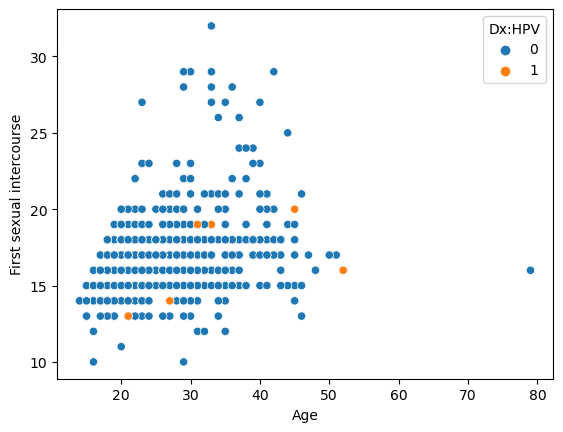

In [35]:
sns.scatterplot(data=numerical_df, x="Age", y="First sexual intercourse", hue="Dx:HPV")